<br>
<div style="text-align:center;"> <font size="12", color = "Blue">StatsThinking21 </font> </div>
<br><br>
<div style="text-align:right;">
    <font size = "7">
        2018/12/28<br>
        DecNef Lab<br>
        Yoshiki Yoshii
    </font>
</div>

</style>
# <font color="Blue">**Chaper 5 Fitting models to data**</font>

<br> 
<font size="5">
        &emsp; One of the fundamental activites in statistics is creating models<br> 
        &emsp; that can summarize data using a small set on numbers. 
</font>

&emsp;&emsp; → <span style="background-color:#00BFFF">We can compact description the data</span>


<font size="7"><b>
    aim 
</b></font>
<br>
<font size="5">
    &emsp; We will discuss the concept of a statistical model and how it can be used to describe data.
</font>




## <font color="Blue"> **5.1 What is a model?** </fon>

<font size="5">
    &emsp; In the physical world, models are generally simplifications of things in the real world<br>  
    &emsp; → Nonetheless, it can explains the essence of the thing being modeled <br>
    &emsp; Like physical models, a statistical model is generally <u>much simpler</u> than the data being described<br>
    &emsp; → it is meant to capture the structure of the data <span style="background-color:#00BFFF">as simply as possible</span><br> 
    &emsp; In both cases, the model is a convenient fiction that interprets over some of the details of being modeled<br>
    &emsp; George Box famously said:<br>
    &emsp;&emsp;&emsp;&emsp;&emsp; "<span style="background-color:#00BFFF">All models are wrong but some are useful</span>"<br><br>
    &emsp;The basic structure of a statistical model is:
</font>
   $$ 
    d a t a = m o d e l + error
   $$ 
   

## <font color="Blue">**5.2 Statistical modeling: An example**</font>

<br>
&emsp;&emsp; Here, fitting a model to data, using the data from NHANES<br>



In [3]:
library(NHANES)
library(dplyr)
library(magrittr)
library(pander)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(modelr)

Warning message:
“Removed 24 rows containing non-finite values (stat_bin).”

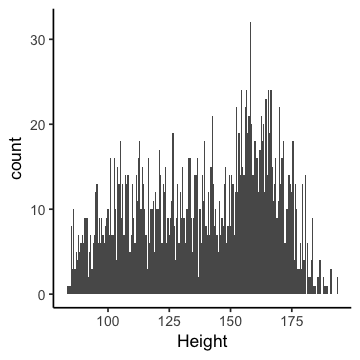

In [4]:
NHANES_child <- NHANES %>% drop_na(Age) %>% filter(Age >= 2 & Age<=17)
p1 <- ggplot(NHANES_child,aes(x=Height))+geom_histogram(binwidth=0.5)
theme_set(theme_classic(base_size = 10.5, base_family = ""))
options(repr.plot.width=3, repr.plot.height=3)
p1

<font size="5">
    <ul>
    <li>We want to describe the data as simply as possible while still capturing their important features<br><br>
    <li>What is the simplest model that can capture the essence of data? <br><br>
    <li>How about the most common value in the dataset (which we call the mode)?<br>
    </ul>
</font>

In [36]:
# create function to compute mode and apply to child height data from NHANES
#R doesn’t have a built-in function for the mode, so we will create one first
getmode <- function(v) {
  uniqv <- unique(v)
  return(uniqv[which.max(tabulate(match(v, uniqv)))])
}

height_mode <- getmode(NHANES_child$Height)
paste("mode of children's height from NHANES:", height_mode)

[1] "mode of children's height from NHANES: 166.5"

<font size="5">
    &emsp; Given this, our model for an individual datapoint $i$ would be:&emsp; $\text {height} _ { i } = 166.5 + \text { error }$ <br>
    &emsp; This redescribes the entire set of all children in terms of a single number.<br>
    &emsp; If we wanted to predict the height of any new children, then our guess would be the same number(166.5cm)<br>
    &emsp;&emsp; How good of a model is this? <br>
    &emsp; In general we define the goodness of a model in terms of the error,<br> 
    &emsp; which represents the difference between model and the data<br>
    &emsp; &emsp;<span style="background-color:#00BFFF"> the model that produces lower error is the better model</span>
</font>    

In [37]:
# compute error compared to the mode and plot histogram

NHANES_child <- NHANES %>%
    drop_na(Height) %>%
    filter(Age>=2 & Age<=17)
#length(NHANES_child$Height)

error_mode <- NHANES_child$Height - height_mode
sprintf("average error from mode (inches): %0.2f", mean(error_mode))

[1] "average error from mode (inches): -27.95"

[1] 166.5

<body>
    <font size="5">
        &emsp; The average individual has a fairly large error.<br>
        &emsp; We would like to have a model where the average error is 0. <br>
        &emsp; We use the mean as our model then this will be the case. <br>
        &emsp; The mean (often denoted by <sup>ー</sup>, such as $\overline { X }$ ) is defined as:<br>
    </font>
</body>

$$\overline { X } = \frac { \sum _ { i = 1 } ^ { n } x _ { i } } { n } $$
<font size="5">
    &emsp; That is, it is the sum of all of the values, divided by the number of values.<br>
</font>

<font size="5">
    &emsp; We can prove that the sum of errors from the mean (and thus the average error) is 0: <br>
    $$\text {error} = \sum _ { i = 1 } ^ { n } \left( x _ { i } - \overline { X } \right) = 0 $$
    $$\sum _ { i = 1 } ^ { n } x _ { i } - \sum _ { i = 1 } ^ { n } \overline { X } = 0 $$
    $$\sum _ { i = 1 } ^ { n } x _ { i } = \sum _ { i = 1 } ^ { n } \overline { X } $$
    $$\sum _ { i = 1 } ^ { n } x _ { i } = n \overline { X } $$
    $$\sum _ { i = 1 } ^ { n } x _ { i } = \sum _ { i = 1 } ^ { n } x _ { i } $$ <br>
    &emsp; Given that the average error is 0, this seems like a better model. <br>
    &emsp; Let's confirm that it comes out correctly.
</font>

In [38]:
# compute error from mean

NHANES_child <- NHANES %>%
    drop_na(Height) %>%
    filter(Age>=2 & Age<=17)

error_mean <- NHANES_child$Height - mean(NHANES_child$Height)
sprintf("average error for mean (inches): %e", mean(error_mean))

[1] "average error for mean (inches): -9.626912e-15"

<font size="5">
    &nbsp; The average error here is a very small number, though not technically zero <br>
    &emsp;&emsp; Why this happens? <br>
    &emsp;&emsp;&emsp; → Due to how computers represent numbers(we will discuss later) <br>
    &nbsp; Each individual still has some degree of error <br>
    &emsp;&emsp; Some are positive and some are negative, and those cancel each other out <br> 
    &emsp;&emsp; We generally count both positive and negative errors as bad and summarize <br>
    &emsp;&emsp; We could use the absolute value of each error value, and it’s more common to use the squared errors
</font>

<body>
    <font size="5">
        <ol>
        <li> we could simply add them </li>
        &emsp; → Sum of squared errors <br>
        &emsp;Its magnitude depends on the number of data points <br>
        &emsp;&emsp; → It can be difficult to interpret unless looking at the same number of observations <br><br>
        <li> We could take the mean of the squared error values </li>
        &emsp; → Mean Squared Error (MSE) <br>
        &emsp;Those are not on the same scale as the original data due to we squared the values before averaging<br>
        &emsp;&emsp; → It's also common to take the square root of the MSE (Root Mean Squared Error:RMSE)
        </ol>
    </font>
</body>

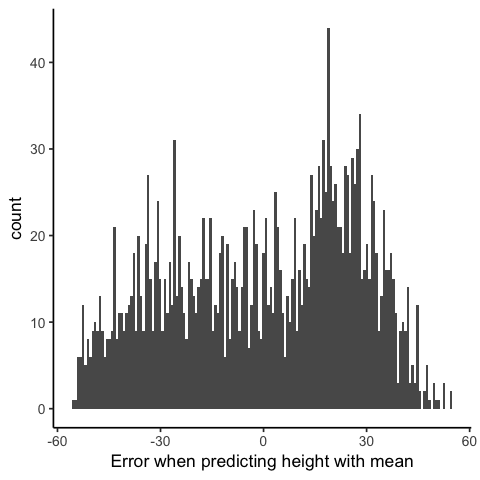

In [8]:
NHANES_child <- NHANES %>% drop_na(Height) %>% filter(Age>=2 & Age<=17)

p2 <- ggplot(NHANES_child,aes(x=error_mean))+geom_histogram(binwidth=0.7)+ xlab("Error when predicting height with mean")
theme_set(theme_classic(base_size = 10.5, base_family = ""))
options(repr.plot.width=4, repr.plot.height=4)
p2

In [39]:
# compute and print RMSE for mean and mode

error_mean <- NHANES_child$Height - mean(NHANES_child$Height)
rmse_mean <- sqrt(mean(error_mean**2))
rmse_mode <- sqrt(mean(error_mode**2))
print(paste("Mode: root mean squared error (centimeters):", rmse_mode))
print(paste("Mean: root mean squared error (centimeters):", rmse_mean))

[1] "Mode: root mean squared error (centimeters): 38.7459459954731"
[1] "Mean: root mean squared error (centimeters): 26.8337868669553"


<font size="5">
    &emsp; This shows that the mean has a pretty substantial amount of error <br>
    &emsp;but it’s still much better than the mode
</font>

### <font color="Blue">5.2.1 Improving our model</font>
<br>
<font size="5">
    &emsp; Can we imagine a better model? <br>
    &emsp; Remember that these data are from all children in the NHANES sample, who vary from 2 to 17 years of age. <br>
    &emsp; Given this wide age range, we might expect that our model of height should also include age. <br>
    &emsp; Let’s plot the data for height against age, to see if this relationship really exists. <br>
</font>

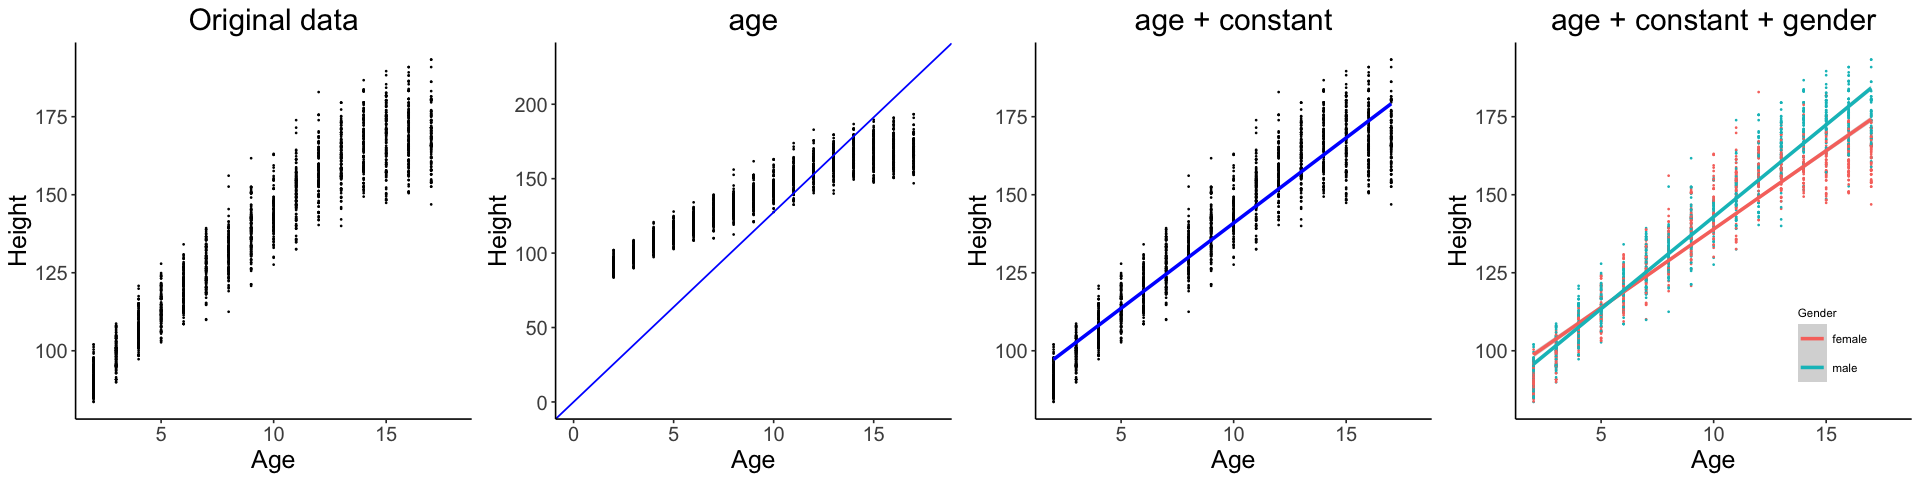

In [16]:
NHANES_child <- NHANES %>%drop_na(Height) %>%filter(Age>=2 & Age<=17) 
p1 <- ggplot(NHANES_child,aes(x=Age,y=Height)) + geom_point(size = 0.1) +  xlim(2,18) + ggtitle("Original data")+ theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15))
p2 <- ggplot(NHANES_child,aes(x=Age,y=Height)) + geom_point(size = 0.1) + xlim(0,18) + ylim(0,230) + ggtitle("age") + theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15))
z <- lsfit(NHANES_child$Age, NHANES_child$Height, wt=NULL, intercept=FALSE)
p2 <- p2+geom_abline(slope = z$coeff, colour = "blue")
p3 <- ggplot(NHANES_child,aes(x=Age,y=Height)) + geom_point(size = 0.1) + xlim(2,18) + stat_smooth(method = "lm", se = TRUE, colour = "blue", size = 1) + ggtitle("age + constant") + theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15))
p4 <- ggplot(NHANES_child,aes(x=Age,y=Height,colour=Gender)) + geom_point(size = 0.1) + xlim(2,18) + stat_smooth(method = "lm", se = TRUE, size = 1) + theme(legend.title=element_text(size=7),legend.text=element_text(size = 7),legend.position=c(0.8,0.2)) + ggtitle("age + constant + gender") + theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15))
theme_set(theme_classic(base_size = 10, base_family = ""))
options(repr.plot.width=16, repr.plot.height=4)
grid.arrange(p1,p2,p3,p4,nrow=1)

<font size="5">
    &emsp; We might build a model that relates height to age:<br>
</font>
    $$\text {height} _ { i } = \beta * a g e _ { i } + \text {error} _ { i }$$
<font size="5">
    &emsp; where β is a parameter that we multiply by age to get the smallest error <br>
    &emsp; Something is clearly wrong with model B <br>
    &emsp;&emsp; → The line doesn’t seem to follow the data very well <br>
    &emsp;&emsp; → This means that the predicted value of height from the model must take on a value of 0 when age is 0 <br>
    &emsp; <font color = "red">problem</font><br>
    &emsp; the line is mathematically constrained to have a y-value of 0 when x is 0 <br>
    &emsp;&emsp; → We can fix this by including a constant value in model<br>
    &emsp; The model is:<br>
</font>
    $$height_{ i } = constant + \beta * age_{ i } + \text {error}_{ i }$$
<font size="5">
    &emsp; where constant is a constant value added to the prediction for all individuals <br>
    &emsp; (which we also call the intercept, since it maps onto the intercept in the equation for a line)
</font>

<font size="5">
    &emsp;Model C fitted to the NHANES data<br>
    &emsp;we see that the line matches the data much better than the one without a constant <br><br>
    &emsp;From the plot of D, it seems that there is a difference between males and females, <br>
    &emsp;but it is relatively small and only emerges after the age of puberty
</font>

In [18]:
model_age <- lm(Height ~ Age, data = NHANES_child)
rmse_age <-
  NHANES_child %>% 
  add_predictions(model_age, var = "predicted_age") %>% 
  summarise(
    sqrt(mean((Height - predicted_age)**2))
  ) %>% 
  pull()
print(sprintf("root mean squared error: %0.2f", rmse_age))

[1] "root mean squared error: 8.34"


In [20]:
# compute model fit for modeling with age and gender
model_age_gender <- lm(Height ~ Age + Gender, data = NHANES_child)
rmse_age_gender <-
  NHANES_child %>% 
  add_predictions(model_age_gender, var = "predicted_age_gender") %>% 
  summarise( sqrt(mean((Height - predicted_age_gender)**2)) ) %>% 
  pull()

sprintf(
  "model: height = %0.2f + %0.2f*Age + %0.2f*Gender",
  model_age_gender$coefficients[1],
  model_age_gender$coefficients[2],
  model_age_gender$coefficients[3]
)
print(sprintf("root mean squared error: %0.2f", rmse_age_gender))

[1] "model: height = 84.33 + 5.48*Age + 3.57*Gender"

[1] "root mean squared error: 8.15"


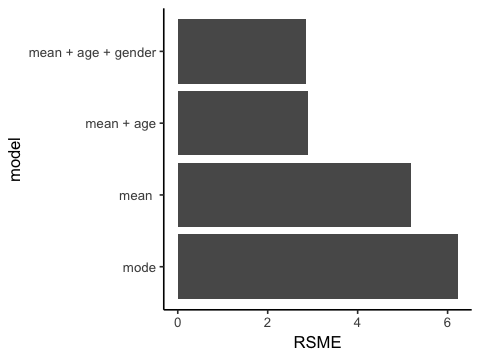

In [44]:
m <- data.frame(
     RMSR = c(sqrt(rmse_age_gender), sqrt(rmse_age), sqrt(rmse_mean), sqrt(rmse_mode)),
     labe = c("mean + age + gender","mean + age","mean ","mode")
)
p1 <- ggplot(m,aes(x = labe, y = RMSR)) + geom_bar(stat = "identity", size=3) + coord_flip()
p1 <- p1 + scale_x_discrete(limits=c("mode", "mean ", "mean + age", "mean + age + gender")) + ylab("RSME") + xlab("model")
theme_set(theme_classic(base_size = 10, base_family = ""))
options(repr.plot.width=4, repr.plot.height=3)
p1


### <font color="Blue">**5.3 What makes a model `good` ?**</font>
<br>
<font size="5">
    &emsp; There are generally two different things.<br>
    <ul>
        <li>as possible as lowest error</li>
        <li>generalize well to new datasets</li>
    </ul>
    <br>
    &emsp; These often are in conflict.<br>
    &emsp; To understand this, let’s think about where error comes from!<br> 
    &emsp; it can occur if our model is wrong<br>
    &emsp;&emsp; → error can also occur even when the model is correct <br> 
    &emsp;&emsp;due to random variation in the data, which we often refer to as 
    <span style="background-color:#F2F2F2">measurement error</span> or <span style="background-color:#F2F2F2">noise</span> 
</font>


<font size="5">
    &emsp;Simulated relationship between blood alcohol content and reaction time on a driving test, with best-fitting linear model.<br>
</font>

<img src="http://statsthinking21.org/StatsThinking21_files/figure-html/BACrt-1.png" title="fig5.5" width="540x400" style="center">

### <font color="Blue">5.4 Can a model be too good?</font>
<font size="5">
    &emsp; The error sounds like a bad thing, and usually we prefer a model has that lower error than higher error. <br>
    &emsp; However, the model with the lowest error often is worse at generalizing to new datasets!<br>
</font>

<img src="http://statsthinking21.org/StatsThinking21_files/figure-html/Overfitting-1.png" title="fig5.6" width="600x400">
<br>
&emsp;&emsp;&emsp; "<span style="background-color:#00BFFF">Everything should be as simple as it can be, but not simpler</span>"<br><br>
   


### <font color="Blue">5.5 The simplest model: The mean</font>
<font size="5">
    &emsp; Mean is commonly used to describe what the “central tendency” of a dataset.<br>
    &emsp; Most people don’t think of computing a mean as fitting a model to data. <br>
    &emsp; However, that’s exactly what we are doing when we compute the mean.<br>
</font>
    $$ \overline { X } = \frac { \sum _ { i = 1 } ^ { n } x _ { i } } { n } $$
<font size="5">
    &emsp; This formula is a set of data points selected from a larger population. <br>
    &emsp; Using a sample, we wish to characterize a larger population<br> 
    &emsp; (the full set of individuals that we are interested in).<br>
    &emsp; describe values for a sample from parameters that describe values for a population.<br>
    &emsp; the formula for the population mean (denoted as μ ) is:<br>
</font>
    $$ \mu = \frac { \sum _ { i = 1 } ^ { N } x _ { i } } { N } $$
<font size="5">
    &emsp; where N is the size of the entire population.
</font>

<font size="5">
    &emsp; The mean is the summary statistic that is guaranteed to give us a 
    <span style="background-color:#F2F2F2">mean error of zero</span>. <br>
    &emsp; The mean also has another characteristic:<br>
    &emsp;&emsp; <u>It is the summary statistic that minimizes the sum of squared errors (SSE).</u><br>    
    &emsp; In statistics, we refer to this as being the “best” estimator. <br>
</font>

<font size="5">
    &emsp; This minimization of SSE is a good feature, and it’s why the mean is the most commonly used statistic to summarize data.<br>
    &emsp; However, the mean also has a dark side.
</font>

In [45]:
# create income data frame

incomeDf <- 
  tibble(
  income = c(48000, 64000, 58000, 72000, 66000),
  person = c("Joe", "Karen", "Mark", "Andrea", "Pat")
)
# glimpse(incomeDf)

panderOptions('digits',2)
#pander(incomeDf)
incomeDf
t(incomeDf)
sprintf("Mean income: %0.2f", mean(incomeDf$income))

income,person
48000,Joe
64000,Karen
58000,Mark
72000,Andrea
66000,Pat


income,48000,64000,58000,72000,66000
person,Joe,Karen,Mark,Andrea,Pat


[1] "Mean income: 61600.00"

In [46]:
# add Beyonce to income data frame

incomeDf <- 
  incomeDf %>% 
  rbind(c(54000000, "Beyonce")) %>% 
  mutate(income = as.double(income))

#pander(incomeDf)
t(incomeDf)
sprintf("Mean income: %0.2f", mean(incomeDf$income))

income,4.8e+04,6.4e+04,5.8e+04,7.2e+04,6.6e+04,5.4e+07
person,Joe,Karen,Mark,Andrea,Pat,Beyonce


[1] "Mean income: 9051333.33"

<font size="5">
    &emsp; In general, the mean is highly sensitive to extreme values, <br><br>
    &emsp; which is why it’s always important to ensure that<br><br>
    &emsp; there are no extreme values when using the mean to summarize data.
</font>

#### <font color="Blue">5.5.1 The median</font>
<br>
<font size="5">
    &emsp; If we want to summarize the data in a way that is less sensitive to outliers<br> 
    &emsp; We can use another statistic called the <span style="background-color:#F2F2F2">median</span>.
</font>

In [410]:
# create example data frame
dataDf <- 
  tibble(
    values = c(8, 6, 3, 14, 12, 7, 6, 4, 9)
  )

#pander(t(dataDf))
t(dataDf)

values,8,6,3,14,12,7,6,4,9


In [415]:
# sort values and print
dataDf <-
  dataDf %>% 
  arrange(values)

#pander(t(dataDf))
t(dataDf)
sprintf("Median: %d",median(dataDf$values))

values,3,4,6,6,7,8,9,12,14


[1] "Median: 7"

<font size="5">
    &emsp; Whereas the mean minimizes the sum of squared errors, the median minimizes a slighty different quantity: <br>
    &emsp; The sum of absolute errors<br><br>
    &emsp; Explains why it is less sensitive to outliers
</font>

In [47]:
incomeDf <-
  incomeDf %>% 
  arrange(income)

t(incomeDf)
sprintf('Mean income: %.2f',mean(incomeDf$income))
sprintf('Median income: %.2f',median(incomeDf$income))


income,4.8e+04,5.8e+04,6.4e+04,6.6e+04,7.2e+04,5.4e+07
person,Joe,Mark,Karen,Pat,Andrea,Beyonce


[1] "Mean income: 9051333.33"

[1] "Median income: 65000.00"

<font size="5">
    &emsp; The median is much more representative of the group as a whole, and less sensitive to the one large outlier.<br>
    &emsp; The mean is the 
    <span style="background-color:#F2F2F2">best</span> 
    estimator in the sense that<br> 
    &emsp; it will vary less from sample to sample compared to other estimators.<br>
    &emsp; It's up to us to decide whether that is worth the sensitivity to potential outliers. <br>
    &emsp; <span style="background-color:#00BFFF">statistics is all about tradeoffs</span>.
</font>

### <font color="Blue">5.6 The mode</font>
<br>
<font size="5">
    &emsp; Sometimes we wish to describe the central tendency of a dataset that is not numeric.
</font>

In [52]:
# compute mean of iPhone model numbers
iphoneDf <- 
  tribble(
    ~iPhoneModel, ~count,
    5, 325,
    6, 450,
    7, 700,
    8, 625
)
meanPhoneNumber <- 
  iphoneDf %>% 
  summarize(
    sum(iPhoneModel * count) / sum(count)
  ) %>% 
  pull()
meanPhoneNumber

[1] 6.77381

### <font color="Blue">5.7 Variability: How well does the mean fit the data?</font>
<br>
<font size="5">
    &emsp; We often want to describe how variable the data<br>
    &emsp; → This is sometimes also referred to as <span style="background-color:#F2F2F2">dispersion</span> <br>
    &emsp; It is the basis for the most commonly used measures of variability: <br>
    &emsp; The <span style="background-color:#F2F2F2">variance</span> and 
    <span style="background-color:#F2F2F2">the standard deviation</span> <br>
</font>
    $$ \sigma ^ { 2 } = \frac { S S E } { N } = \frac { \sum _ { i = 1 } ^ { n } \left( x _ { i } - \mu \right) ^ { 2 } } { N }$$
<font size="5">
    &emsp; where $\sigma ^ { 2 }$ is the variance for a population and $\mu$ is the population mean<br>
    &emsp; We usually don't have access to the entire population, so we have to compute the variance using a sample<br>
    &emsp; which we refer to as  $\hat { \sigma } ^ { 2 }$, with the $\hat{}$ representing the fact that this is an estimate based on a sample<b r>
    $$\hat { \sigma } ^ { 2 } = \frac { \sum _ { i = 1 } ^ { N } \left( x _ { i } - \overline { X } \right) ^ { 2 } } { n - 1 }$$

In [100]:
# generate example data points
dfDf <- tibble( x = c(3, 5, 7, 9, 11) )

#pander(dfDf)
t(dfDf)

# compute mean
meanx <- dfDf %>% summarize( mean(x) ) %>% pull()
sprintf('%0.2f',meanx)

x,3,5,7,9,11


[1] "7.00"

<font size="5">
    &emsp; Because we know that the mean of this dataset is 7,<br> 
    &emsp; we can compute what any specific value would be if it were missing<br>
</font>
    $$ 7 * n = 35 \text { and } 35 - ( 5 + 7 + 9 + 11 ) = 3 $$



### <font color="Blue">5.8 Using simulations to understand statistics</font>
<br>
<font size="5">
    &emsp; treat the entire sample of children from the NHANES data as 
    <span style="background-color:#F2F2F2">population</span> <br>
    &emsp; see how well the calculations of sample variance using either $N$ or $N-1$ in the denominator will estimate the population variance
</font>

In [438]:
# compare variance estimates using N or N-1 in denominator

population_variance <- NHANES_child %>% summarize( var(Height) ) %>% pull()

# take 100 samples and estimate the sample variance using both N or N-1  in the demoninator
sampsize <- 50
nsamp <- 1000
varhat_n <- array(data = NA, dim = nsamp)
varhat_nm1 <- array(data = NA, dim = nsamp)

for (i in 1:nsamp) {
  samp <- sample_n(NHANES_child, 1000)[1:sampsize, ]
  sampmean <- mean(samp$Height)
  sse <- sum((samp$Height - sampmean)**2)
  varhat_n[i] <- sse / sampsize
  varhat_nm1[i] <- sse / (sampsize - 1)
}

sprintf("population variance: %.2f", population_variance)
sprintf("variance estimate(n): %.2f", mean(varhat_n))
sprintf("variance estimate(n-1): %.2f", mean(varhat_nm1))

[1] "population variance: 720.38"

[1] "variance estimate(n): 706.86"

[1] "variance estimate(n-1): 721.28"

### <font color="Blue">5.9 Z-scores</font>
<br>
<fonr size="5">
    &emsp; it is often useful to express the individual scores in terms of where they sit with respect to the overall distribution <br><br>
</font>
<img src="http://statsthinking21.org/StatsThinking21_files/figure-html/crimeHist-1.png" title="fig5.8" width="540x400" style="float:left;">
<img src="http://statsthinking21.org/StatsThinking21_files/figure-html/popVsCrime-1.png" title="fig5.9" width="540x400">

<font size="5">
    &emsp; we see that California is not so dangerous after all<br>
    &emsp; its crime rate of 396.1 per 100,000 people is a bit above the mean of 346.81 <br>
    &emsp; The formula to compute a Z-score for a data point given that<br> 
    &emsp; we know the value of the population mean $\mu$ and standard deviation $\sigma$ is:<br>
</font>
    $$ Z ( x ) = \frac { x - \mu } { \sigma } $$
<font size="5">
    &emsp; We can think of a Z-score as telling you how far away from the mean any data point
</font>

<font size="5">
    &emsp; "mean of Z-scored data: 1.4658413372004e-16" <br>
    &emsp; "std deviation of Z-scored data: 1"<br>
    &emsp; The shows that the process of Z-scoring doesn't change the relative distribution of the data points.<br>
    &emsp; it just shifts them to have a mean of 0 and a standard deviation of 1. <br>
    &emsp; &nbsp; (However, if you look closely, you will see that the mean isn’t exactly 0) <br>
    &emsp; This provides us with a slightly more interpretable view of the data. <br>
    &emsp; For example, we can see that Nevada, Tennessee, and New Mexico all have crime rates <br>
    &emsp; that are roughly two standard deviations above the mean.<br>
</font>
<img src="http://statsthinking21.org/StatsThinking21_files/figure-html/crimeZplot-1.png" title="fig5.10" width="300x250" style="float:left;">
<img src="http://statsthinking21.org/StatsThinking21_files/figure-html/crimeZmap-1.png" title="fig5.11" width="300x250">

#### <font color="Blue">5.9.1 Interpreting Z-scores</font>
<br>
<font size="4">
    &emsp; The Z in Z-score comes from the fact that the standard normal distribution is often referred to as the Z distribution.<br>
    &emsp; &nbsp; (that is, a normal distribution with a mean of zero and a standard deviation of 1)<br>
    &emsp; it shows that we expect about 16% of values to fall in Z≥1, and the same proportion to fall in Z≤−1.<br>
    &emsp; Thus, if we know the Z-score for a particular data point, <br>
    &emsp; we can estimate how likely or unlikely we would be to find a value at least as extreme as that value, which lets us put values into better context.<br>
</font>
<img src="http://statsthinking21.org/StatsThinking21_files/figure-html/zDensityCDF-1.png" title="fig5.11" width="300x250" style="float:left;">
<img src="http://statsthinking21.org/StatsThinking21_files/figure-html/zDensity2SD-1.png" title="fig5.12" width="300x250">



#### <font color="Blue">5.9.2 Standardized scores</font>
<font size="5">
    &nbsp; Instead of Z-scores, we generate standardized crime scores with a mean of 100 and standard deviation of 10. <br>
    &nbsp; We can do this by simply multiplying the Z-scores by 10 and then adding 100.<br>
</font>

#### <font color="Blue">5.9.2.1 Using Z-scores to compare distributions</font>
<font size="5">
    &nbsp; One useful application of Z-scores can be compared distributions of different variables.<br>
    &nbsp; Having put the data into Z-scores for each variable makes them comparable. <br>
</font>
<p class="img_center">
   <img src="http://statsthinking21.org/StatsThinking21_files/figure-html/crimeTypePlot-1.png" title="fig5.13" width="540x400">
</p>


<font size="5">
    &emsp; Let's add one more factor to the plot: Population. <br>
    &emsp; Because Z-scores are directly comparable, we can also compute a “Violence difference” score that <br>
    &emsp; expresses the relative rate of violent to non-violent (property) crimes across states.<br>
    &emsp; then, we can plot those scores against population <br>
    &emsp; This shows how we can use Z-scores to bring different variables together on a common scale.<br>
</font>
<p class="img_center">
<img src="http://statsthinking21.org/StatsThinking21_files/figure-html/crimeTypePopPlot-1.png" title="fig5.13" width="540x400">
</p>
